<a href="https://colab.research.google.com/github/ArijeetGoswami/-CUSTOMER-CHURN-PREDICTION-FOR-A-TELECOM-COMPANY/blob/main/customer_churn_analysis_case_study_on_telecom_industry_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first lets load the dataset form the kaggle using the api link
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadityabansalcodes/telecommunications-industry-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telecommunications-industry-customer-churn-dataset


In [ ]:
#since the file downoalded is a zip file so we need to exteact the zip file from the path
import os

#algorithm
for filename in os.listdir(path):
  if filename.endswith(".csv"):
    csv_file = os.path.join(path, filename)
    break



3.IMPORTING THE IMPORATNT LIBRARIES AND DEPENDENCIES


In [ ]:
#loading dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    #data vizualization libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder   #provides vizulization of categorical features
from imblearn.over_sampling import SMOTE  #for class imbalace in the target column  #oversampling technique --> to uniformaly build taget class
from sklearn.model_selection import train_test_split, cross_val_score
#models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle   #to save the file later on so it can be used

DATA LOADING AND UNDERSTANDING


In [ ]:

data_set = pd.read_csv(csv_file)
data_set.head()


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#INIITIAL INSPECTION FOR THE DATA
#SHAPE DETERMINING
data_shape = data_set.shape
print(f"the number of rows and column is{data_shape}")

'''
#dislaying max clouns together
data_col = pd.set_option("display.max_columns",None)
print(f"the columns are {data_set.head()}")
'''
#for seiing the types of data as well knowwing wetehr the data is null or not
data_information = data_set.info()
print(f"the data_set information is {data_information}")


the number of rows and column is(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-n

In [ ]:
#dislaying max clouns together

data_set_col = pd.set_option("display.max_columns",None)
print(f"the cols of data are {data_set.head()}")

the cols of data are    LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  \
0            No  No phone service              DSL              No   
1           Yes                No              DSL             Yes   
2           Yes                No              DSL             Yes   
3            No  No phone service              DSL             Yes   
4           Yes                No      Fiber optic              No   

  Online Backup Device Protection Tech Support Streaming TV Streaming Movies  \
0           Yes                No           No           

In [ ]:
#displaying the columns
data_cloumns = data_set.columns
print(f"the columns of data sets are {data_cloumns}")

the columns of data sets are Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


cleaning of the data set

In [ ]:
#dropping of the columns
#dropping the customer_id columns as not required for modelling
data_set = data_set.drop('Customer ID',axis=1)
print(f"the updated data_set columns is {data_set.columns}")

the updated data_set columns is Index(['LoyaltyID', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


In [ ]:
#checking the data-set
data_set.head()

,LoyaltyID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#lets see the unique values to determine wether the columns are catgorical or numerical
for col in data_set.columns:
  unique_values = data_set[col].unique()
  print(f"the unique values of {col} is {unique_values}")
  print('*'*50)

the unique values of LoyaltyID is [318537 152148 326527 ... 155157 731782 353947]
**************************************************
the unique values of Senior Citizen is ['No' 'Yes']
**************************************************
the unique values of Partner is ['Yes' 'No']
**************************************************
the unique values of Dependents is ['No' 'Yes']
**************************************************
the unique values of Tenure is [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
the unique values of Phone Service is ['No' 'Yes']
**************************************************
the unique values of Multiple Lines is ['No phone service' 'No' 'Yes']
**************************************************
the unique values of Internet Service i

In [ ]:
#lets print for the nmerical columns
numerical_list = []
categorical_list = []
for cols in data_set.columns:
  unique_values = data_set[col].unique()
  if data_set[cols].dtype == "int64" or data_set[cols].dtype == "float64":
    numerical_list.append(cols)
    print(f"the numerical columns are {numerical_list}")
  else:
    categorical_list.append(cols)
    print(f"the categorical columns are {categorical_list}")


the numerical columns are ['LoyaltyID']
the categorical columns are ['Senior Citizen']
the categorical columns are ['Senior Citizen', 'Partner']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents']
the numerical columns are ['LoyaltyID', 'Tenure']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Li

In [ ]:
#lets see the list properly
print(f"the numerical columns are {numerical_list}")
print(f"the categorical columns are {categorical_list}")

the numerical columns are ['LoyaltyID', 'Tenure', 'Monthly Charges']
the categorical columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn']


In [ ]:
#lets only just see the unique values in the categorical columns
for col in data_set.columns:
  if col not in numerical_list:
    unique_values = data_set[col].unique()
    print(f"the uniue values of {col} is {unique_values}")
    print("*"*50)




the uniue values of Senior Citizen is ['No' 'Yes']
**************************************************
the uniue values of Partner is ['Yes' 'No']
**************************************************
the uniue values of Dependents is ['No' 'Yes']
**************************************************
the uniue values of Phone Service is ['No' 'Yes']
**************************************************
the uniue values of Multiple Lines is ['No phone service' 'No' 'Yes']
**************************************************
the uniue values of Internet Service is ['DSL' 'Fiber optic' 'No']
**************************************************
the uniue values of Online Security is ['No' 'Yes' 'No internet service']
**************************************************
the uniue values of Online Backup is ['Yes' 'No' 'No internet service']
**************************************************
the uniue values of Device Protection is ['No' 'Yes' 'No internet service']
*****************************************

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

DTERMINING THE NULL VALUES



In [ ]:
#1st lets see the number of missing values
missing_values = data_set.isnull().sum()
print(f"the missing values are {missing_values}")

#lets verify for total charges column
total_carges_missing_value = data_set.isnull().sum()
print(f"the missing values are {total_carges_missing_value}")

the missing values are LoyaltyID            0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
the missing values are LoyaltyID            0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


NOW CONVERSION OF VALUES

In [ ]:
#COVERTING THE TOTAL CHAGES COLUMN TO INTEGER
'''
data_set['Total Charges'] = data_set["Total Charges"].astype(float)
print(data_set.info())
#
'''

'\ndata_set[\'Total Charges\'] = data_set["Total Charges"].astype(float)\nprint(data_set.info())\n#\n'

In [ ]:
#since the problem has arise of the string cannot be coverted to float
#lets tackle the problem (empty_space)

#1 filter the space dataSset on the data-frame
filtering_the_total_charges = data_set[data_set['Total Charges']== ' ']
print(f"the total chagers with space is {filtering_the_total_charges}")
print("*"*50)


#lets detrmine the length of the filtering_total_charegs_data
lentgth_of_total_charges_data = len(filtering_the_total_charges)
print(f"the length of the filtering_the_total_charges_data is {lentgth_of_total_charges_data}")
#there are 11 rows where the total chanegs value is empty


the total chagers with space is       LoyaltyID Senior Citizen Partner Dependents  Tenure Phone Service  \
488      344543             No     Yes        Yes       0            No   
753      150036             No      No        Yes       0           Yes   
936      497688             No     Yes        Yes       0           Yes   
1082     158969             No     Yes        Yes       0           Yes   
1340     470044             No     Yes        Yes       0            No   
3331     937662             No     Yes        Yes       0           Yes   
3826     821083             No     Yes        Yes       0           Yes   
4380     947028             No     Yes        Yes       0           Yes   
5218     135257             No     Yes        Yes       0           Yes   
6670     317862             No     Yes        Yes       0           Yes   
6754     392646             No      No        Yes       0           Yes   

        Multiple Lines Internet Service      Online Security  \
488

In [ ]:
#for better observant  #ote filtering the data from a dataframe
data_set[data_set['Total Charges']== ' ']

,LoyaltyID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,344543,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,150036,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,497688,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,158969,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,470044,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,937662,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,821083,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,947028,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,135257,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,317862,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


replace the missing values in the data

In [ ]:
#replacing the missng values in the totoal charges
data_set['Total Charges'] = data_set['Total Charges'].replace(" ", "0.0")
print(f"the updated data_set is {data_set.head()}")

the updated data_set is    LoyaltyID Senior Citizen Partner Dependents  Tenure Phone Service  \
0     318537             No     Yes         No       1            No   
1     152148             No      No         No      34           Yes   
2     326527             No      No         No       2           Yes   
3     845894             No      No         No      45            No   
4     503388             No      No         No       2           Yes   

     Multiple Lines Internet Service Online Security Online Backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No           

In [ ]:
#lets convert the total_charges column into the floatting value
data_set['Total Charges']= data_set['Total Charges'].astype(float)
print(f"the upadets data set: {data_set.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

understanding the distribution of the taget column

In [ ]:
#here we nedd to see wheteher the two unique classes or values are balaced properly or noot
#checking the class distribution of target column  --> Churn
checking_distrbution = data_set['Churn'].value_counts()
print(f"the class distibution of the churn columns is {checking_distrbution}")

the class distibution of the churn columns is Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
#THARE IS CLEAR IMBALANCE INTHE PARTICULAR DATASET SO WE CANNOT TRAIN OUR MMODEL DIRECTLY
#NEED TO PEROFRM UPPER-SAMPLING OR DOWN-SAMPLING TO Increase the majority class or minority class

In [ ]:
#lets put all the insights in the excel to get a clear undertsanding

**INSIGHTS**
1. 'Customer ID' removed as it is not required for modeling
2. No missing vaalues in the data-set
3. missing values in the Total charges cloumn were replaced with 0
4. class imbalance identified in the target

3. EDA --> EXploratory Data Analysis


In [ ]:
#lets cehck the columns names
data_columns = data_set.columns
print(f"the columns of the data_set are {data_columns}")
print("*"*50)

#viweing  the data
data_view = data_set.head()
print(f"the data_set is {data_view}")

the columns of the data_set are Index(['LoyaltyID', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')
**************************************************
the data_set is    LoyaltyID Senior Citizen Partner Dependents  Tenure Phone Service  \
0     318537             No     Yes         No       1            No   
1     152148             No      No         No      34           Yes   
2     326527             No      No         No       2           Yes   
3     845894             No      No         No      45            No   
4     503388             No      No         No       2           Yes   

     Multiple Lines Internet Service Online Security Online Backup  \
0  No phone se

calcualate descriptive statistical analysis --> (mean, median, mode)

In [ ]:
#number of vaues
number_of_values = data_set.count()
print(f"the number of values are {number_of_values}")
print("*"*50)

#statistical values
statistical_vlaues = data_set.describe()    #not only work on the numneric data-types
print(f"{statistical_vlaues}")

the number of values are LoyaltyID            7043
Senior Citizen       7043
Partner              7043
Dependents           7043
Tenure               7043
Phone Service        7043
Multiple Lines       7043
Internet Service     7043
Online Security      7043
Online Backup        7043
Device Protection    7043
Tech Support         7043
Streaming TV         7043
Streaming Movies     7043
Contract             7043
Paperless Billing    7043
Payment Method       7043
Monthly Charges      7043
Total Charges        7043
Churn                7043
dtype: int64
**************************************************
           LoyaltyID       Tenure  Monthly Charges  Total Charges
count    7043.000000  7043.000000      7043.000000    7043.000000
mean   550382.651001    32.371149        64.761692    2279.734304
std    260776.118690    24.559481        30.090047    2266.794470
min    100346.000000     0.000000        18.250000       0.000000
25%    323604.500000     9.000000        35.500000     398.55

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Understanding the dsitribution of the numneric features

In [ ]:
#histogram function

def histo_plot(data_set, column_name):
  #setupt for plottingthe grph
  plt.figure(figsize=(10,5))
  #utilizing the seaborn
  sns.histplot(data_set[column_name], kde= True)
  plt.title(f"histographic distribution of the {column_name}")


  #lets cal=cluate the statistical value of the data_Set column --> mean(), meadian()
  mean_value = data_set[column_name].mean()
  print(f"the mean value of {column_name} is {mean_value}")
  median_value = data_set[column_name].median()
  print(f"the median vaue of {column_name} is {median_value}")
  mode_value = data_set[column_name].mode()
  print(f"the mode value of the {column_name} is {mode_value}")

  #lets add vertical lines to these mean, median, mode value for undersatnding
  plt.axvline(mean_value, color='red', linestyle='--',label = 'Mean')
  plt.axvline(median_value, color='green', linestyle='solid',label = 'Median')

  plt.legend()
  plt.show()


the mean value of Monthly Charges is 64.76169246059918
the median vaue of Monthly Charges is 70.35
the mode value of the Monthly Charges is 0    20.05
Name: Monthly Charges, dtype: float64


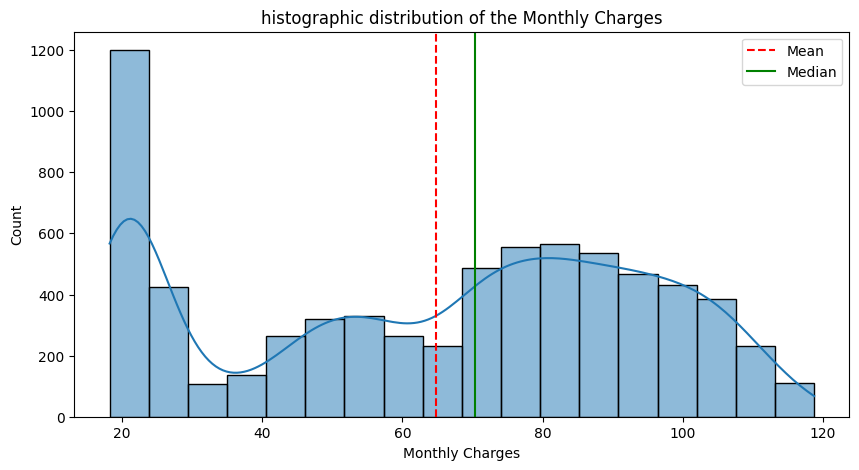

In [ ]:
column_name = 'Monthly Charges'
object1 = histo_plot(data_set, column_name)

the mean value of Total Charges is 2279.7343035638223
the median vaue of Total Charges is 1394.55
the mode value of the Total Charges is 0     0.0
1    20.2
Name: Total Charges, dtype: float64


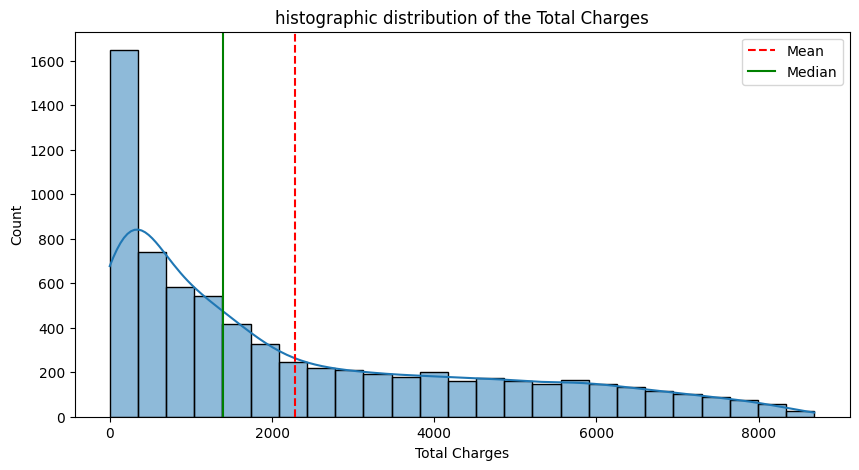

In [ ]:
column_name = 'Total Charges'
object2 = histo_plot(data_set, 'Total Charges')

the mean value of Tenure is 32.37114865824223
the median vaue of Tenure is 29.0
the mode value of the Tenure is 0    1
Name: Tenure, dtype: int64


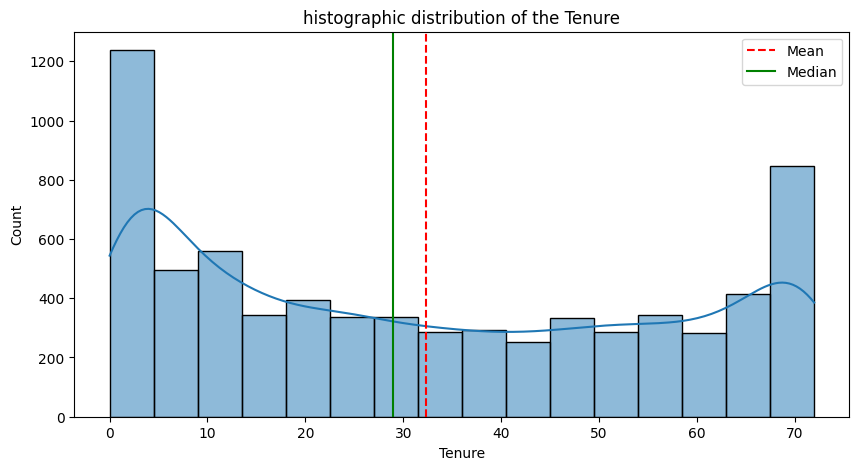

In [ ]:
column_name = 'Tenure'
object3 = histo_plot(data_set, 'Tenure')

In [ ]:
# combining the all the dirtbuted graph
column_name = ['Monthly Charges', 'Total Charges', 'Tenure']
def combine_all_graph(column_name):
  for col in column_name:
    histo_plot(data_set,col)


the mean value of Monthly Charges is 64.76169246059918
the median vaue of Monthly Charges is 70.35
the mode value of the Monthly Charges is 0    20.05
Name: Monthly Charges, dtype: float64


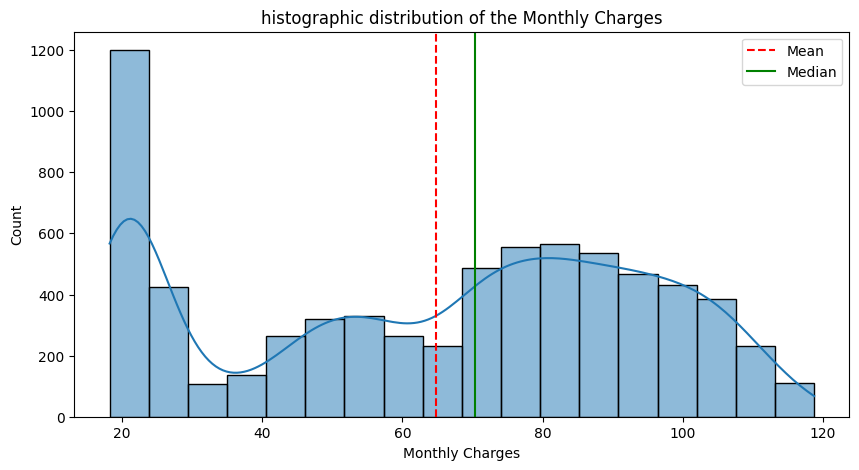

the mean value of Total Charges is 2279.7343035638223
the median vaue of Total Charges is 1394.55
the mode value of the Total Charges is 0     0.0
1    20.2
Name: Total Charges, dtype: float64


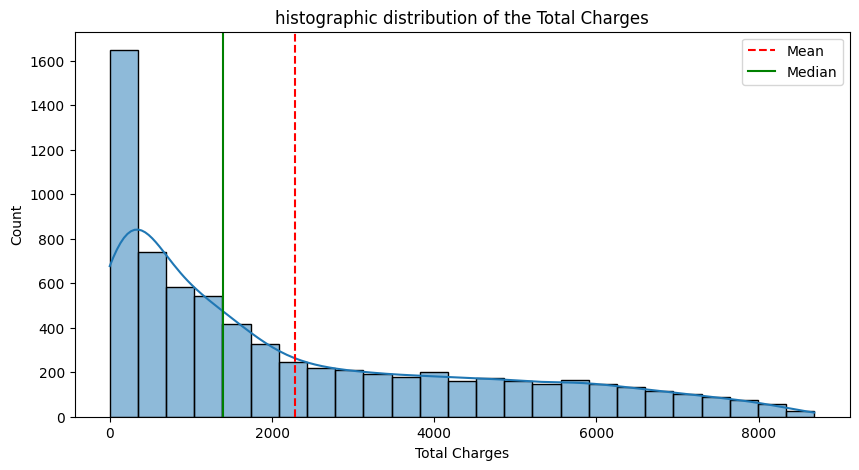

the mean value of Tenure is 32.37114865824223
the median vaue of Tenure is 29.0
the mode value of the Tenure is 0    1
Name: Tenure, dtype: int64


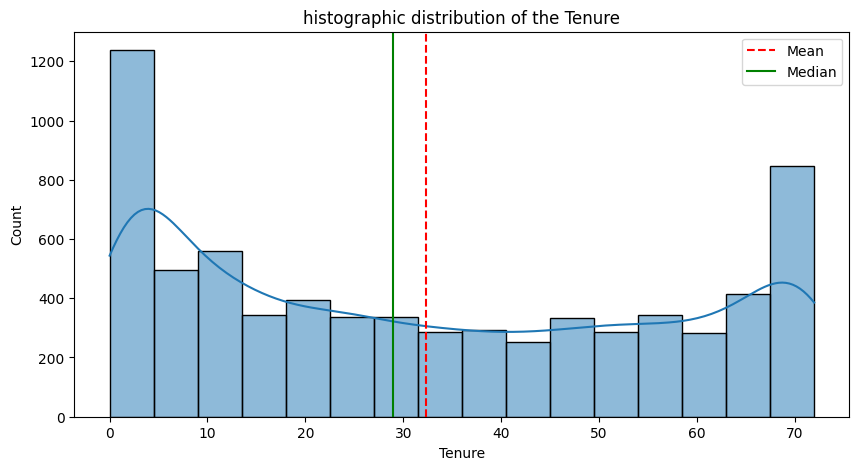

In [ ]:
combined_graph = combine_all_graph(column_name)

**Insights**
1. we completed for the distribution plot

** BOX PLOTTING OF THE DATA_SET**
-->USED TO identify the outliers
--> doen only for numerical features

In [ ]:
def box_plotting(data_Set, column_name):
  #setting upt the plotting
  plt.figure(figsize=(10,5))
  sns.boxplot(data_set[column_name])
  plt.title(f"box plot of the {column_name}")
  plt.ylabel(column_name)
  plt.show()


In [ ]:
column_name = ['Monthly Charges', 'Total Charges', 'Tenure']

#defining a functio ofor plotting
def combined_box_plotting(column_name):
  for col in column_name:
    box_plotting(data_set, col)

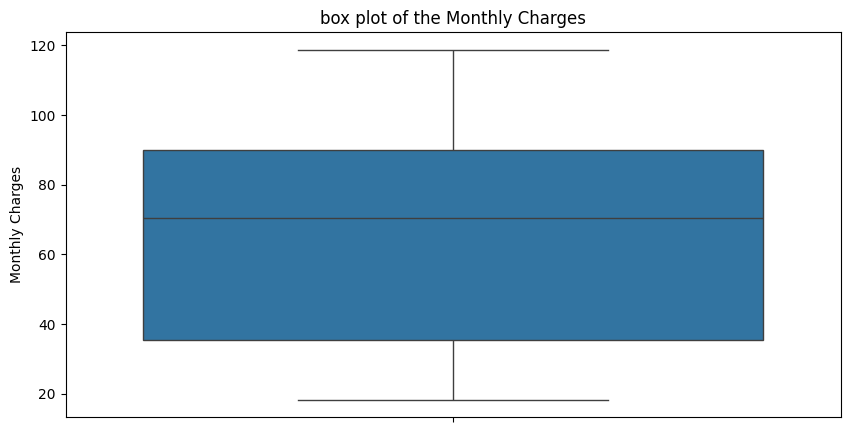

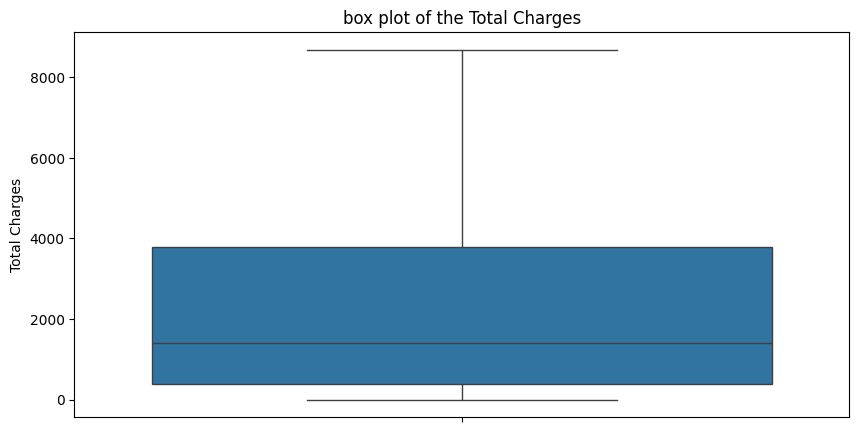

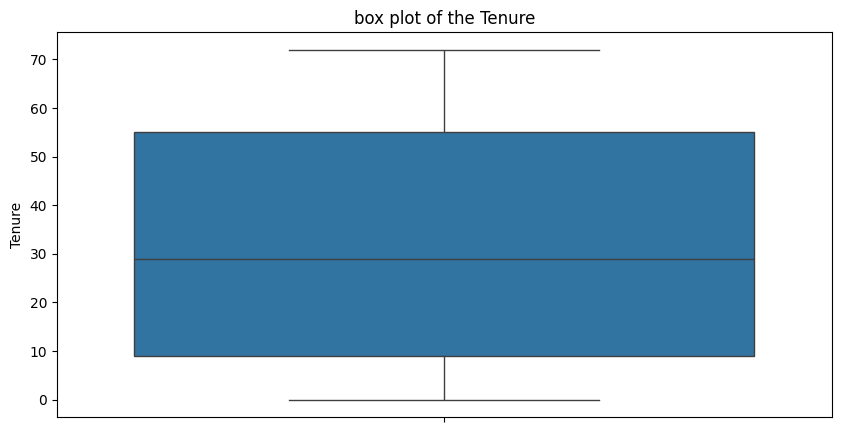

In [ ]:
#creting object
object3 = combined_box_plotting(column_name)

correlation heat-map for numnerical columns

In [ ]:
#define a function
def correlation_heatmap(data_set,column_name):
  #setting up the plotting
  plt.figure(figsize=(10,5))

  sns.heatmap(data_set[['Monthly Charges', 'Total Charges', 'Tenure']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
  plt.title(f"correlation of the {column_name}")
  plt.show()



In [ ]:
column_name =  ['Monthly Charges', 'Total Charges', 'Tenure']

def cobined_heat_map_graph(column_name):
  for col in column_name:
    correlation_heatmap(data_set,col)

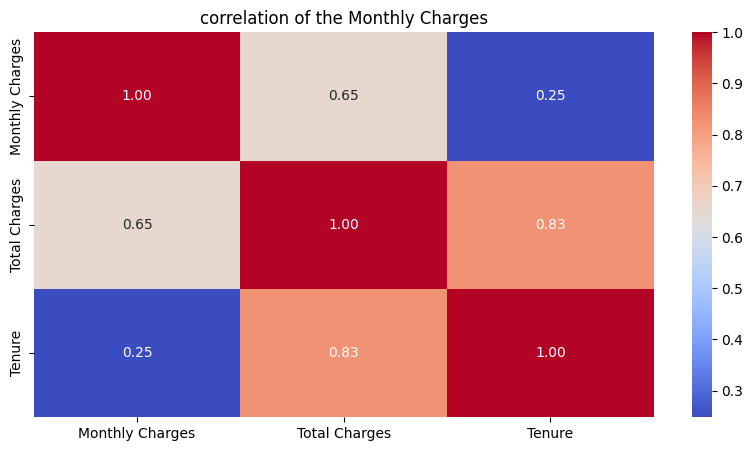

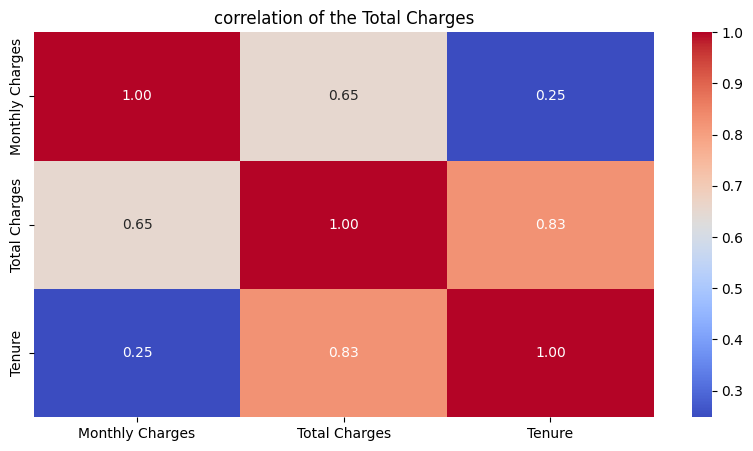

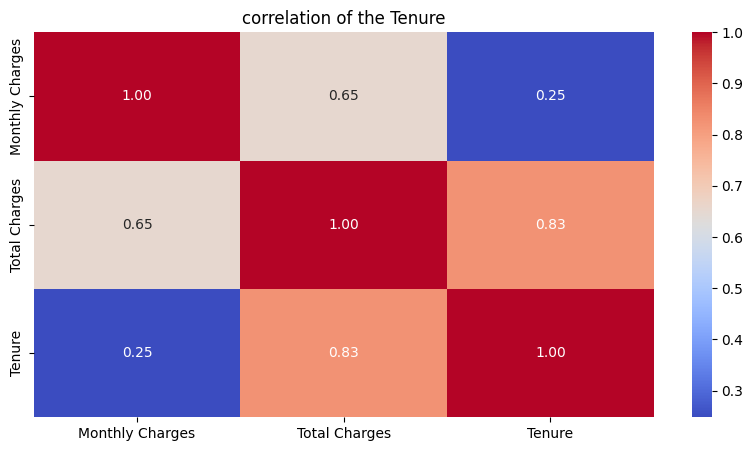

In [ ]:
object4 = cobined_heat_map_graph(column_name)

**catrgorical features analysis**

In [ ]:
#lest see the column
data_set.columns

Index(['LoyaltyID', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

1. we will draw com plot and tells how the catgorica features are distributed
   (whether evenly distibuted or there is imbalance)

In [ ]:
#lets data-set information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [ ]:
#lets create a function to find attributes only those where there is a categorcal like object

In [ ]:
def categorica_value_from_data(data_set):
  #define the attributes with value object data_type
  object_col = data_set.select_dtypes(include="object").columns.to_list()
  print(f"the columns with object data_type are {object_col}")
  return object_col

In [ ]:
#cretig an object
object5 = categorica_value_from_data(data_set)
object5

the columns with object data_type are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn']


['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn']

In [ ]:
# @title Default title text
'''
supoose you wat to add some columns in object cols whic was earlier not listed in the categorical cols
following snippet code is
object_col = ["Column_name_you_want_to_provide"], object_cols
'''

'\nsupoose you wat to add some columns in object cols whic was earlier not listed in the categorical cols\nfollowing snippet code is\nobject_col = ["Column_name_you_want_to_provide"], object_cols\n'

#now automate count plot for the categorical columns

In [ ]:
#define a function
def count_plot(data_set):
  #selecting attribute with data type object
  object_col = data_set.select_dtypes(include="object").columns
  #run a oop
  for col in object_col:
    #setting up figure
    plt.figure(figsize=(10,5))
    sns.countplot(x=data_set[col])  #for all the columns of the datset with categorical values
    plt.title(f"count plot of the {col}")
    plt.show()


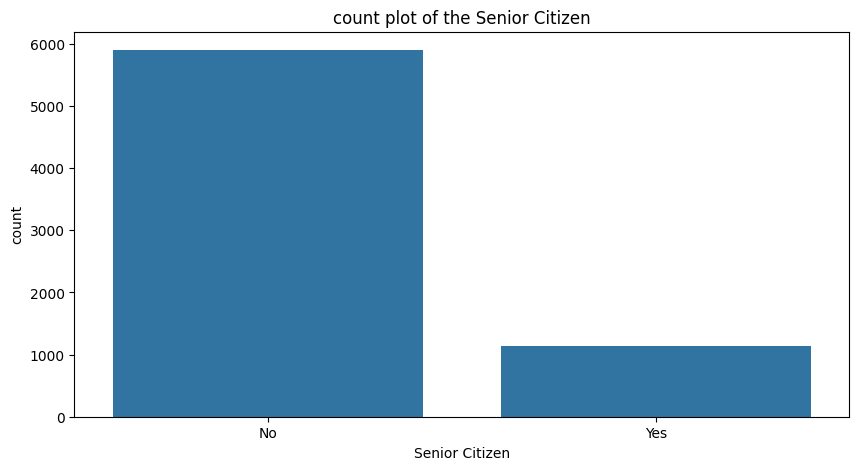

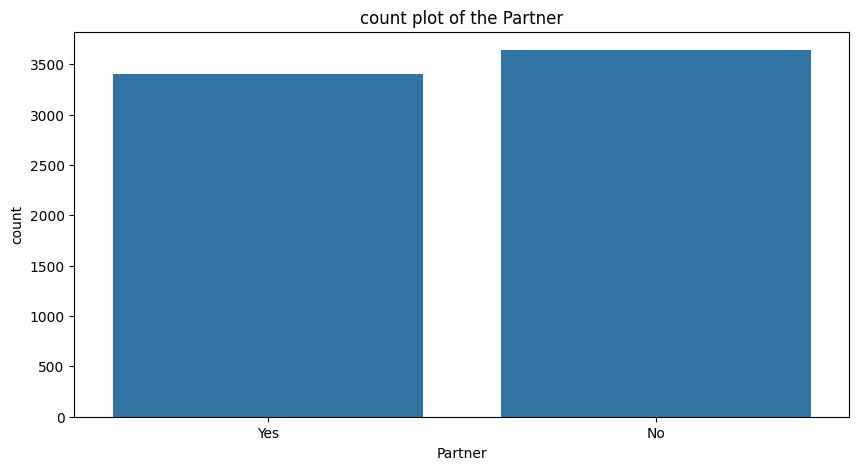

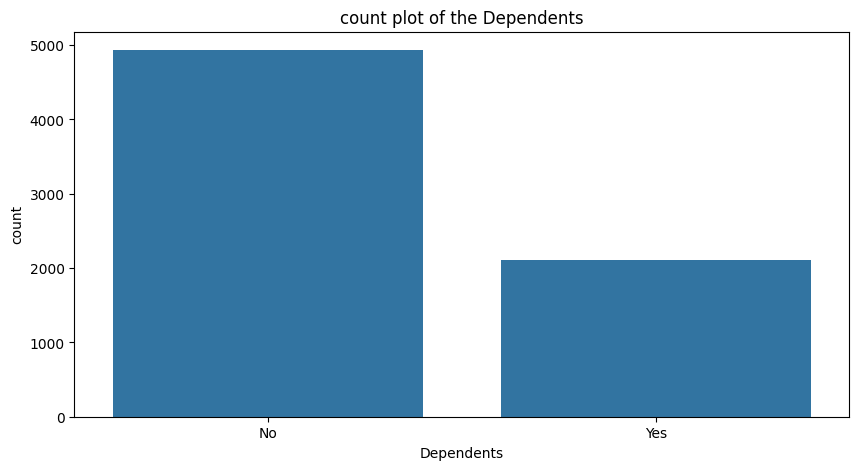

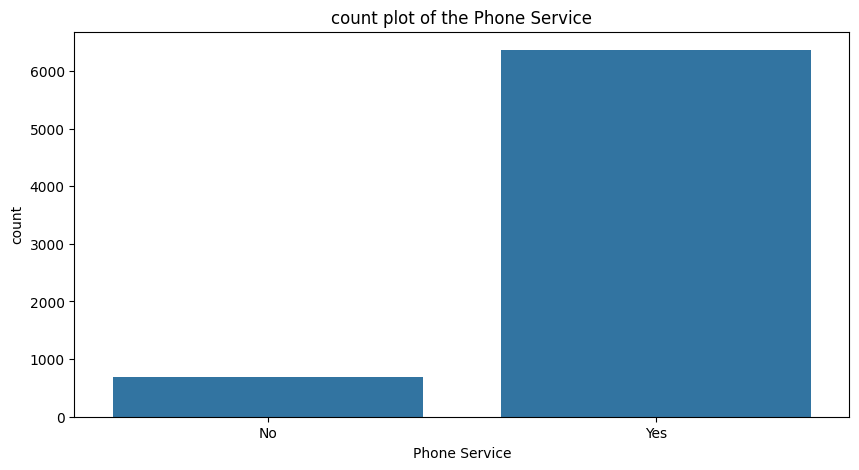

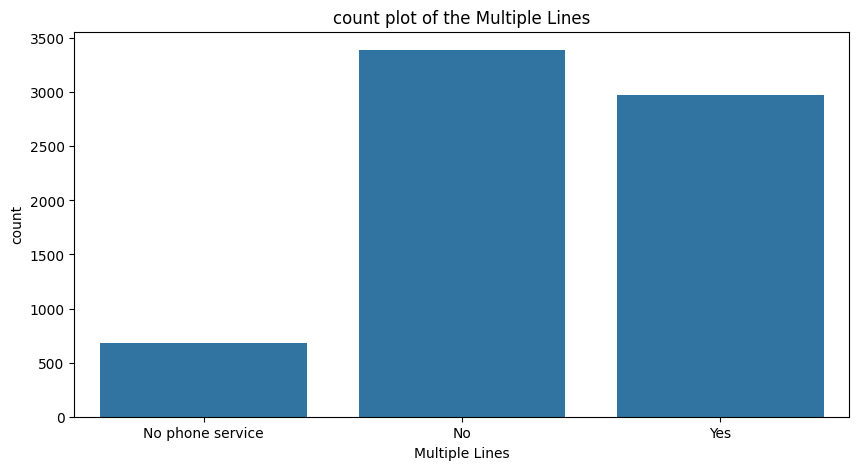

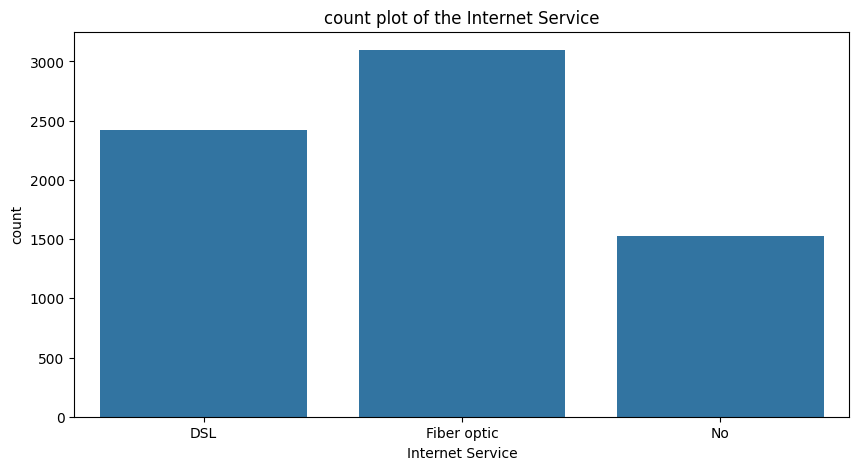

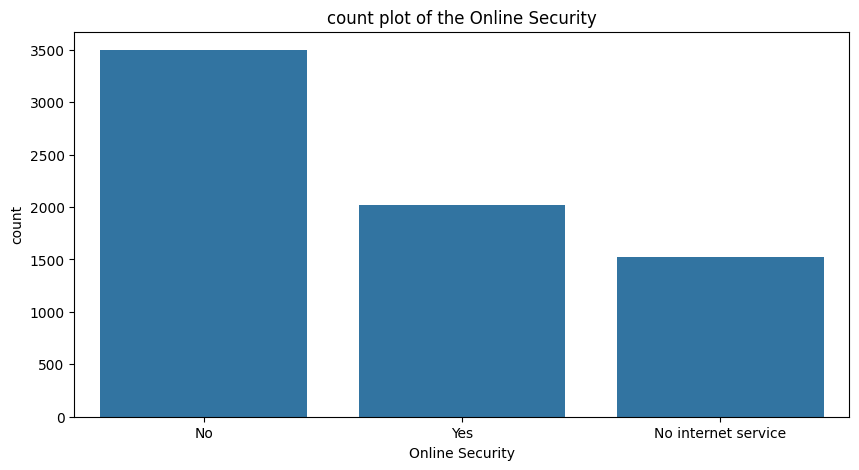

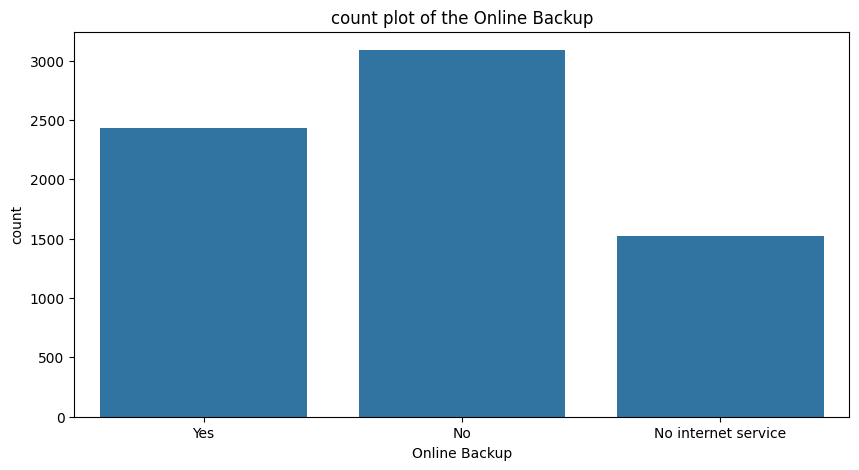

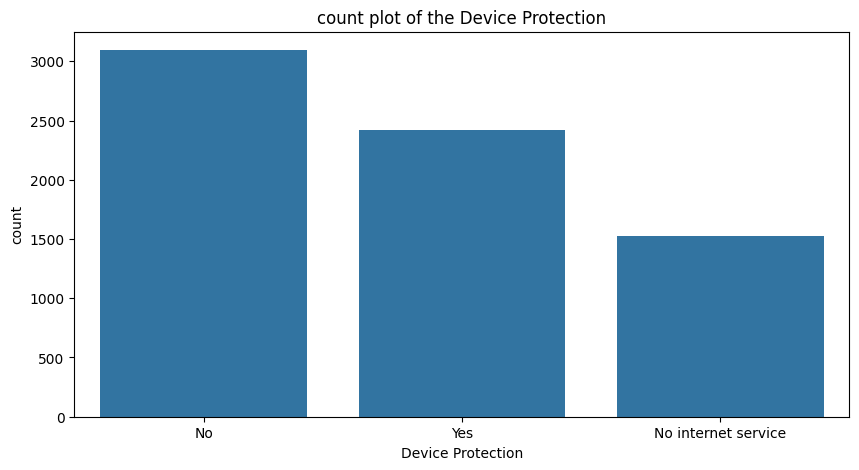

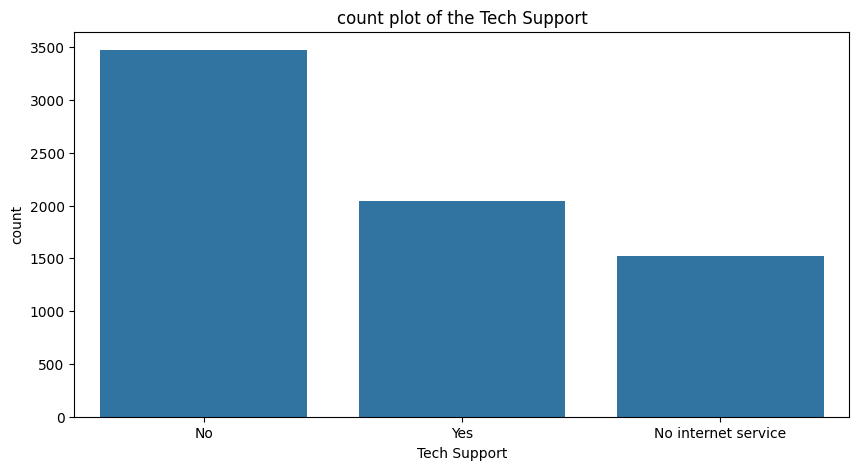

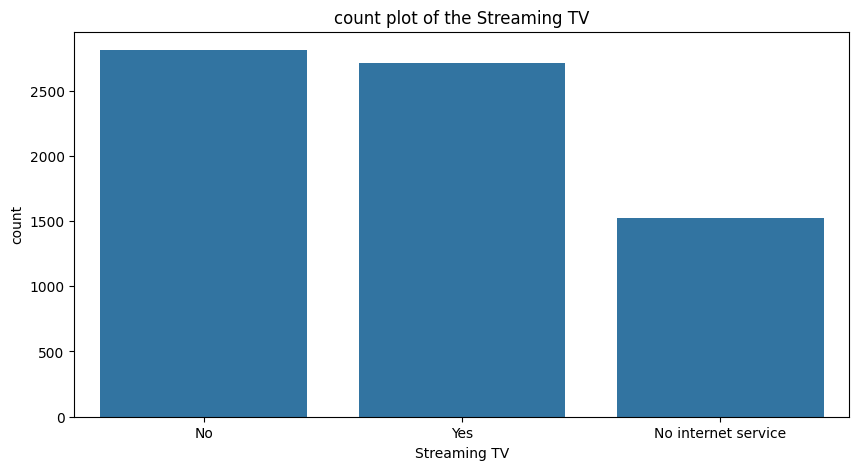

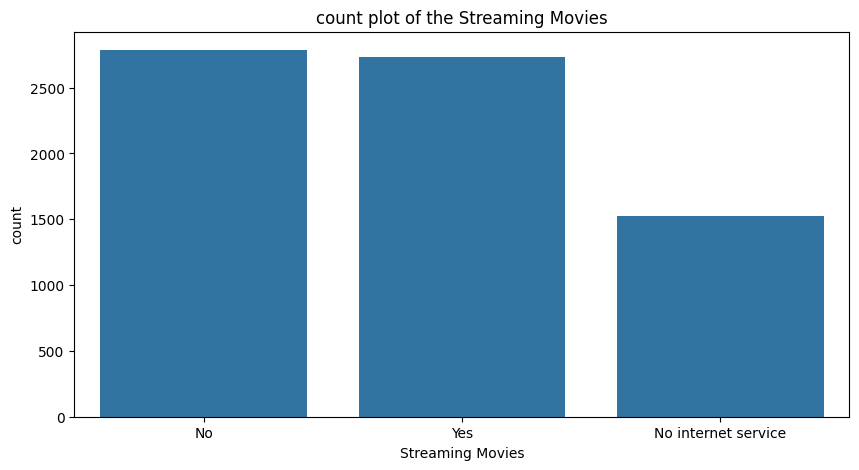

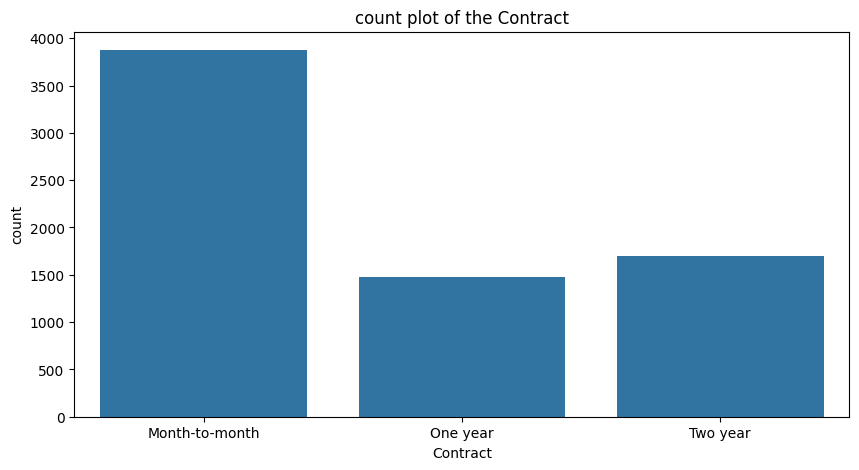

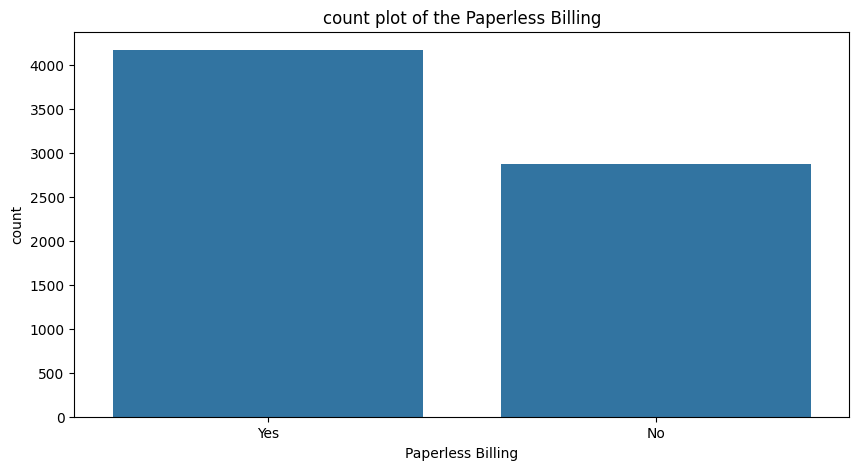

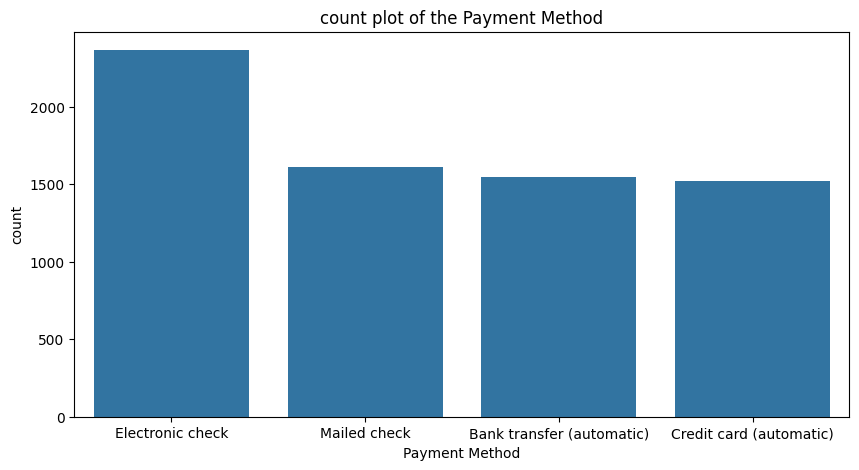

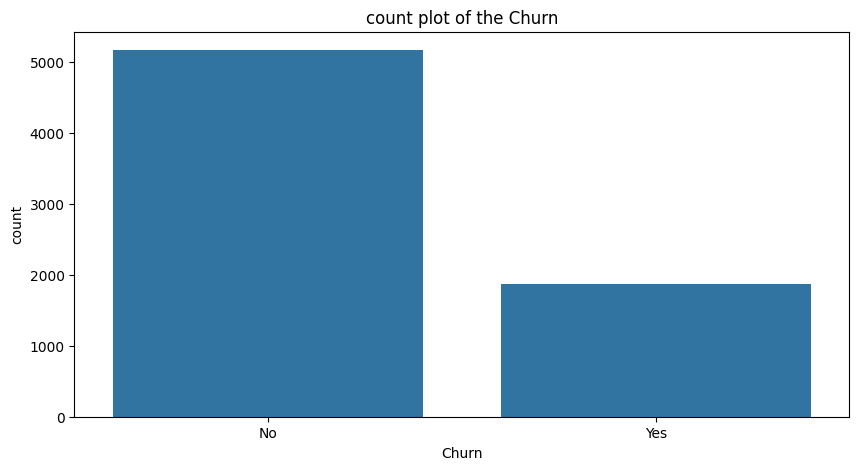

In [ ]:
object6 = count_plot(data_set)
object6

In [ ]:
# @title Default title text
#1. we can clearly see that there are no uniform unform distribution amont the columns in the data set
#2. lets focus on our target column that the churn column

 DATA PREPROCESSING


In [ ]:
# @title Default title text
'''
1. label encoding of the target column form the data_set  #we will doe replacing '''

'\n1. label encoding of the target column form the data_set  #we will doe replacing '

In [ ]:

#lets define a function
def label_encoding(data_set):
  #replacing of the chhurn column in the data -set
  churn_values = data_set['Churn'].unique()
  print(f"the values of the churn column are {churn_values}")
  data_set['Churn']= data_set['Churn'].replace({"Yes": 1, "No":0})
  return data_set

In [ ]:
# Extra reference

'''
def label_encoding(data_set):
  #replacinf the churn column in the data_set
  churn_values = data_set['Churn'].unique()
  print(f"the values of the churn column are {churn_values}")
  for col in churn_values:
    data_set['Churn'] = data_set['Churn'].replace(col, 1 if col == "Yes" else 0)
    return data_set
    '''

In [ ]:
object7 = label_encoding(data_set)
object7.head()

the values of the churn column are ['No' 'Yes']


<ipython-input-136-9e74fe728119>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set['Churn']= data_set['Churn'].replace({"Yes": 1, "No":0})


,LoyaltyID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,152148,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,326527,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,845894,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,503388,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
#lets check the values
updated_values = data_set['Churn'].value_counts()
print(f"the updated values are {updated_values}")

the updated values are Churn
0    5174
1    1869
Name: count, dtype: int64


**Insights**
1. we did label encoding with the target column churn
2. we determined the unique values of the churn column
3. we changed the values of Yes: 0 and No: 1
4. We checked the updated vlaues

#label encoding for all the categorical valeus

#resaon--> model onlt understand the numeric data-set

In [ ]:
#define the function
#detrmine the columns with object data_types
#label encoding function
#initialize dictionary to save encoders
#apply label encoder
#save the encoders to pickel file

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [ ]:
#selct with columns with categorical values
object_columns = data_set.select_dtypes(include="object").columns.to_list()
print(f"the object columns are {object_columns}")

the object columns are ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [ ]:
#initialize encoder dictionary
encoder = {}


def encoding_all(object_columns):
  for col in object_columns:
    #initialize label encoder
    label_encoder = LabelEncoder()
    #define the columns
    data_set[col] = label_encoder.fit_transform(data_set[col])
    #save to label encoder
    encoder[col] = label_encoder
  return data_set
  #saving the picke file
#  with open("encoder.pkl", "wb") as file:
 #   pickle.dump(encoder, file)

In [ ]:
with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

In [ ]:
object8 = encoding_all(object_columns)
object8.head()

,LoyaltyID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,152148,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,326527,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,845894,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,503388,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
encoder

{'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder()}

In [ ]:
data_set

,LoyaltyID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,152148,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,326527,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,845894,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,503388,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,230811,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,155157,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,731782,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


Handel the imbalance in the target column


1.   Training the test data-split
   



In [ ]:
#splitting the features and taegat column

def split_target_column(data_set):
    x = data_set.drop(columns=['Churn'])  #taking out the column from the data-set
    print(f"the dropped column {x}")
    y = data_set['Churn']   #STROINg the data set into y --> target column
    return y

In [ ]:
object9 = split_target_column(data_set)
object9

the dropped column       LoyaltyID  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0        318537               0        1           0       1              0   
1        152148               0        0           0      34              1   
2        326527               0        0           0       2              1   
3        845894               0        0           0      45              0   
4        503388               0        0           0       2              1   
...         ...             ...      ...         ...     ...            ...   
7038     810338               0        1           1      24              1   
7039     230811               0        1           1      72              1   
7040     155157               0        1           1      11              0   
7041     731782               1        1           0       4              1   
7042     353947               0        0           0      66              1   

      Multiple Lines  Internet S

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
#split train and test data

#importing the module
from sklearn.model_selection import train_test_split

x = data_set.drop(columns=['Churn'])
y = data_set['Churn']

#defining the function
def testing_the_target(x, y):
  #dining x and y
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   #20 test data, and remianing 80 is the train data, random state --> reproducibility
  return x_train, x_test, y_train, y_test

In [ ]:
tarin_test_data = testing_the_target(x,y)
tarin_test_data

(      LoyaltyID  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
 2142     904741               0        0           1      21              1   
 1623     250435               0        0           0      54              1   
 6074     592815               0        1           0       1              0   
 1362     957963               0        0           0       4              1   
 6754     392646               0        0           1       0              1   
 ...         ...             ...      ...         ...     ...            ...   
 3772     271880               0        1           0       1              1   
 5191     192047               0        1           1      23              1   
 5226     274864               0        1           1      12              1   
 5390     516431               1        0           0      12              1   
 860      361995               0        0           0      26              1   
 
       Multiple Lines  Internet Servic

In [ ]:
#lets see a detail information for the y_train column

#deine the training and testing again
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def detail_infromation(y_train):
  value_counts = y_train.value_counts()
  print(f"the value counts are {value_counts}")
  shape_of_y =  y_train.shape
  print(f"the shape of the y_train is {shape_of_y}")


In [ ]:
detail_info = detail_infromation(y_train)
detail_info

the value counts are Churn
0    4138
1    1496
Name: count, dtype: int64
the shape of the y_train is (5634,)


**still there is imbalance**
1. we willl perform oversampling technique
2. Synthetic Minorty Oversampling TEchnique

** SMOTE**

In [ ]:
#importing the dependencies
from imblearn.over_sampling import SMOTE


#deifining the smote GOLOBALYY
smote = SMOTE()

def oversampling_function(smote,X_train,y_train):
  x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  return x_train_smote, y_train_smote

In [ ]:
over_sample = oversampling_function(smote,X_train,y_train)
over_sample


(      LoyaltyID  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
 0        904741               0        0           1      21              1   
 1        250435               0        0           0      54              1   
 2        592815               0        1           0       1              0   
 3        957963               0        0           0       4              1   
 4        392646               0        0           1       0              1   
 ...         ...             ...      ...         ...     ...            ...   
 8271     103394               0        0           0       2              1   
 8272     994276               0        0           0      17              1   
 8273     913965               0        0           1      21              1   
 8274     157909               0        1           0      37              1   
 8275     332218               0        1           0      52              1   
 
       Multiple Lines  Internet Servic

In [ ]:
#check the dettain information for smote function
def detail_infromation_smote(y_train_smote):
  value_counts = y_train_smote.value_counts()
  print(f"the value counts are {value_counts}")
  shape_of_y =  y_train_smote.shape
  print(f"the shape of the y_train is {shape_of_y}")


In [ ]:
detail_info = detail_infromation_smote(y_train_smote)
detail_info

the value counts are Churn
0    4138
1    4138
Name: count, dtype: int64
the shape of the y_train is (8276,)


**insights**
1. define the train,test,split
2. deining the smote function
3. define the x_train_smote, y_train_smote
4. value counts, shapes

In [ ]:
#taking out two ipotant train test split
#deine the training and testing again
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#smote function
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
-

5. MODEL training

In [ ]:
#trainig with default hyperparameters
#deinfing dictionary for models
#now deining the models in dict models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=47),
    "Random Forest": RandomForestClassifier(random_state=47),
    "XGboost": XGBClassifier(random_state=47)
}

In [ ]:
#defining the function in dictionary
cv_scores = {}

#defing a function for the cross validation for each models

def cross_validation_function(models):
  #runnfing a loop
  for model_name, model in models.items():
    print(model_name)
    print(model)
    print('*'*50)



#deifning the object
cross_validation_models = cross_validation_function(models)
cross_validation_models



Decision Tree
DecisionTreeClassifier(random_state=47)
**************************************************
Random Forest
RandomForestClassifier(random_state=47)
**************************************************
XGboost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=47, ...)
**************************

In [ ]:
#lets begin training and testing the data and perofrm cross validation
#defining cross validation score dictionary
cv_scores = {}

#define a function
#perform s-fold cross validation for each model
def cross_validation_function2(models):
  #deiing the models name for each parameter
  for model_name, model in models.items():
    print(f"the models being used {model_name} for training")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
    #storing the score in cv_scores  (5-scores)
    cv_scores[model_name] = scores
    #determining the mean() value of cv_scores--> mean determining the average
    mean_score = np.mean(scores)
    print(f"the mean score for {model_name} is : {(mean_score):.2f}")
    print('*'*50)



In [ ]:
cross_validate_score = cross_validation_function2(models)
cross_validate_score

the models being used Decision Tree for training
the mean score for Decision Tree is : 0.78
**************************************************
the models being used Random Forest for training
the mean score for Random Forest is : 0.83
**************************************************
the models being used XGboost for training
the mean score for XGboost is : 0.83
**************************************************


In [ ]:
# to have a watch over the exact score
#see the dictionary
cv_scores


{'Decision Tree': array([0.66243961, 0.7081571 , 0.83383686, 0.85619335, 0.84048338]),
 'Random Forest': array([0.69565217, 0.75166163, 0.90996979, 0.89123867, 0.90513595]),
 'XGboost': array([0.69746377, 0.73232628, 0.90634441, 0.89305136, 0.92567976])}

Random Forest and XGBoost gives the better acuuracy as seen form the cv_score

In [ ]:
#LETS DEAL WITH RFC
#definig it globally
rfc = RandomForestClassifier

def model_1(data_set):
  model = rfc(random_state=42)
  print(f"the model name is {rfc}")
  model.fit(x_train_smote, y_train_smote)
  return model


In [ ]:
model1 = model_1(data_set)
model1

the model name is <class 'sklearn.ensemble._forest.RandomForestClassifier'>


RandomForestClassifier(random_state=42)

In [ ]:
#now take out the important function
'''
model.fit(x_train_smote, y_train_smote)'''

In [ ]:
#testing  #note need to verify
'''
xbg = XGBClassifier(random_state=42)
model.fit(x_train_smote,y_train_smote) '''

In [ ]:
#checking the count in the y test
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Evaluation

In [ ]:
# evalutaing the test data with Random Forest tree

def model_evaluation_for_random_forest():
   rfc = RandomForestClassifier(random_state=42)
   rfc.fit(x_train_smote, y_train_smote)
   y_test_pred = rfc.predict(X_test)
   print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
   print("*"*50)
   print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
   print("*"*50)
   print("Classification Report:\n", classification_report(y_test, y_test_pred))


In [ ]:
model_evalution_1 = model_evaluation_for_random_forest()
model_evalution_1

Accuracy Score:
 0.7821149751596878
**************************************************
Confusion Matrix:
 [[883 153]
 [154 219]]
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#lets also save the features name
model_data = {"model1":rfc,"features_names": x.columns.to_list()}



#save the trained models as pickel file
with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_evalution_1, f)

**LOAD THE SAVE MODEL AND BUILD A PREDICTIVE SYSTEM**

In [ ]:
#LOAD THE CUSTOMER CHURN MODEL AND THE ENCODERS
with open("customer_churn_model.pkl", "rb") as f:
  model_evalution_1 = pickle.load(f)

loaded_model = model_data["model1"]
features_names = model_data["features_names"]

In [ ]:
print(loaded_model)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
print(features_names)

['LoyaltyID', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']


In [ ]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": "0",
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": "1",
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": "29.85",
    "TotalCharges": "29.85",
}

#covert this thing into data-frame
input_data = pd.DataFrame(input_data)


with open("encoder.pkl",'rb') as f:
  encoders = pickle.load(f)


